In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
bs = 64

In [4]:
data = ImageDataBunch.from_folder(path='data', size=244, ds_tfms=get_transforms(), bs=bs, no_check=True).normalize(imagenet_stats)

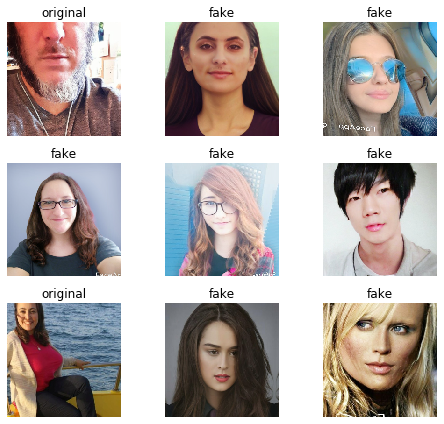

In [5]:
data.show_batch(rows=3, figsize=(7, 6))

In [24]:
data.classes

['fake', 'original']

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.168882,2.272971,0.433962,00:13
1,0.998971,1.404004,0.311321,00:11
2,0.832915,1.390599,0.349057,00:10
3,0.749832,1.384942,0.405660,00:11


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

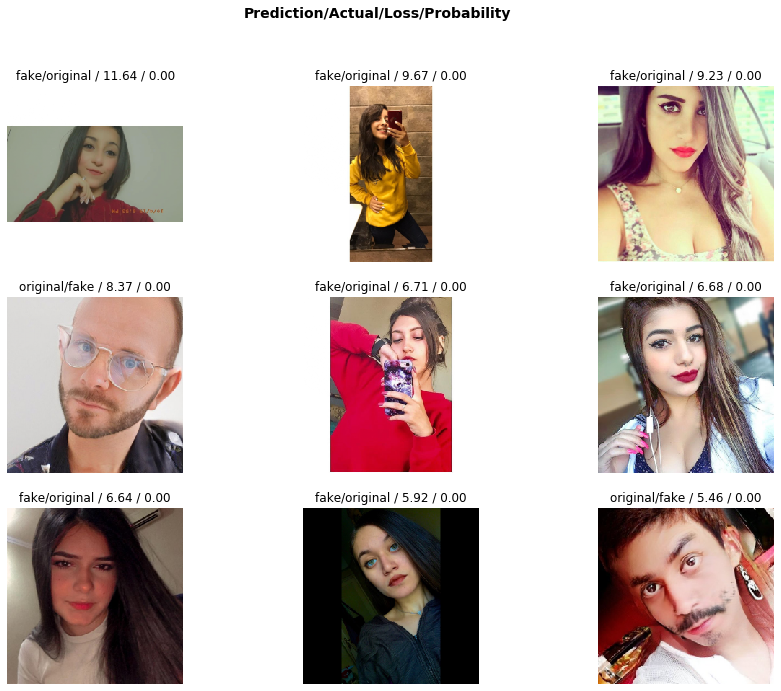

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

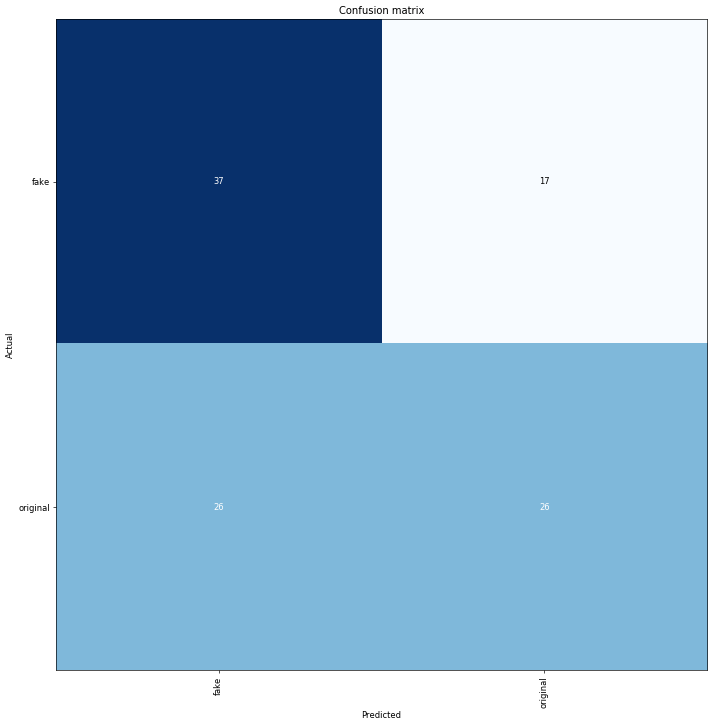

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('original', 'fake', 26), ('fake', 'original', 17)]

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.772387,1.393510,0.283019,00:12


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.535953,1.111392,0.235849,00:12
1,0.502605,1.579563,0.320755,00:12
2,0.442380,1.200249,0.283019,00:12
3,0.359315,1.008229,0.264151,00:11


In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


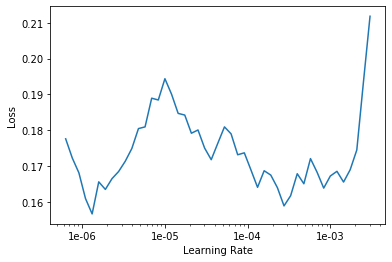

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.192477,1.060408,0.264151,00:12
1,0.156063,1.069060,0.254717,00:13


In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.159205,1.299463,0.254717,00:12
1,0.135188,1.248220,0.264151,00:12


In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.121597,1.209166,0.245283,00:12
1,0.110318,1.229171,0.198113,00:12
2,0.115271,1.317124,0.235849,00:12
3,0.102692,1.274058,0.235849,00:12
4,0.086630,1.223804,0.235849,00:12


In [21]:
learn.save('stage-34')

# Loading Saved model 

In [8]:
learn.load('stage-34')

Learner(data=ImageDataBunch;

Train: LabelList (423 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: data;

Valid: LabelList (106 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

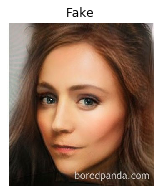

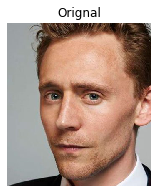

In [76]:
fake_img = open_image('test_images/fake_1.jpg')
orig_img = open_image('test_images/original_1.jpg')

show_image(fake_img)
plt.title('Fake')
plt.show()
show_image(orig_img)
plt.title('Orignal')
plt.show()

In [28]:
# make prediction
pred = learn.predict(fake_img)

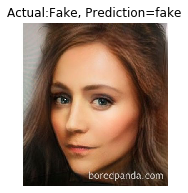

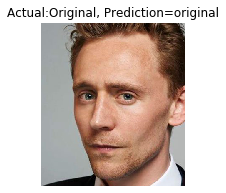

In [41]:
test_images = ['Fake', 'Original']
for i, image in enumerate([fake_img, orig_img]):
    show_image(image)
    pred = learn.predict(image)
    plt.title(f"Actual:{test_images[i]}, Prediction={data.classes[pred[1].item()]}")
    plt.show()

In [88]:
def test_2_images(images, labels):
    test_images = ['Fake', 'Original']
    for i, image in enumerate(images):
        show_image(image)
        pred = learn.predict(image)
        plt.title(f"Actual:{labels[i]}, Prediction={data.classes[pred[1].item()]}")
        plt.show()

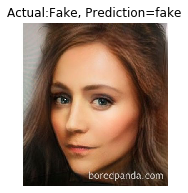

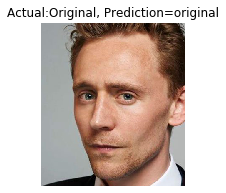

In [77]:
test_2_images([fake_img, orig_img], ['Fake', 'Original'])

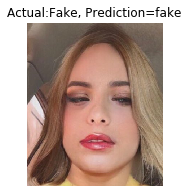

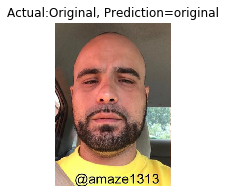

In [78]:
fake_img = open_image('test_images/fake_2.jpg')
orig_img = open_image('test_images/original_2.jpg')

test_2_images([fake_img, orig_img], ['Fake', 'Original'])

# FastAI datablock

In [48]:
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=128)
       .databunch())

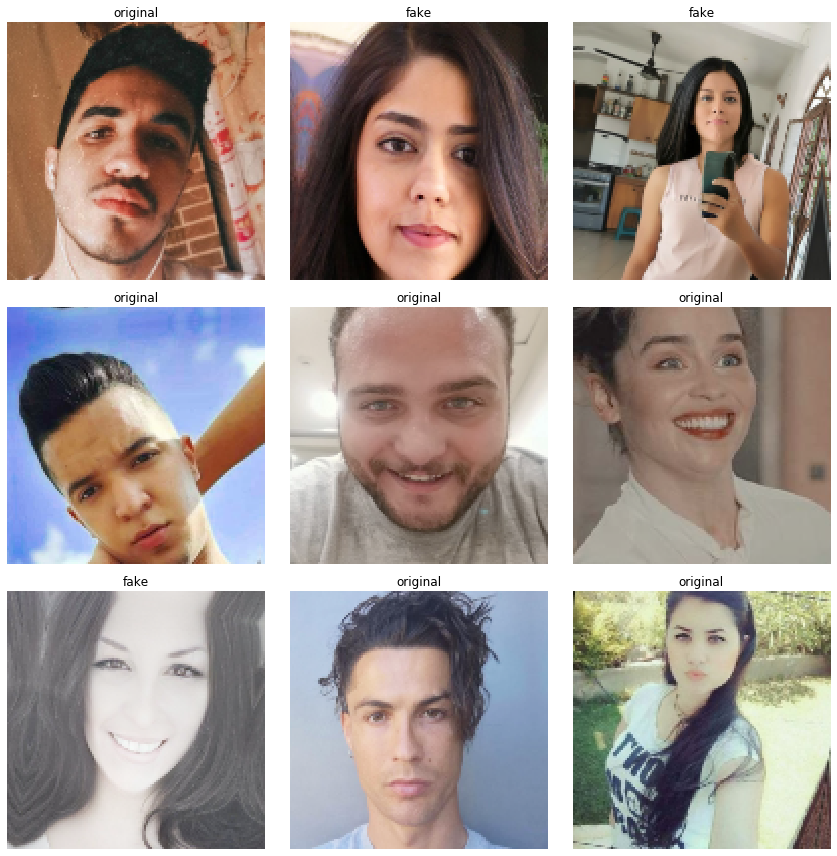

In [50]:
data.show_batch(rows=3)

In [53]:
len(data.valid_ds),len(data.train_ds)

(105, 424)

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [55]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.177161,0.949670,0.304762,00:06
1,1.004326,1.077162,0.266667,00:05
2,0.890502,1.040909,0.342857,00:06
3,0.856596,1.037354,0.323810,00:06


In [56]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.901877,1.672803,0.333333,00:06


In [57]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.531478,1.858607,0.314286,00:08
1,0.554180,1.602751,0.247619,00:06
2,0.484568,1.580073,0.257143,00:06
3,0.422845,1.418121,0.257143,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


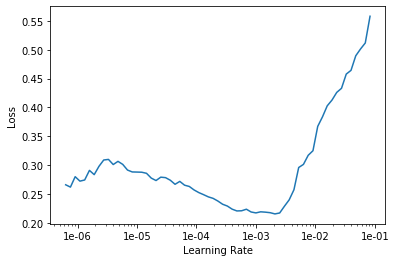

In [59]:
learn.lr_find()
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.079331,1.262805,0.285714,00:06
1,0.107091,1.285821,0.314286,00:08


In [62]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.142971,1.288895,0.304762,00:07
1,0.109721,1.265158,0.285714,00:06
2,0.114109,1.287376,0.276190,00:06
3,0.113591,1.292308,0.276190,00:07


In [63]:
# save current model
learn.save('fastaisplit-34-1')

In [80]:
# using the full size images
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=244)
       .databunch())

In [81]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [82]:
learn.load('fastaisplit-34-1')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
original,original,original,fake,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [83]:
learn.freeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.431174,0.447456,0.200000,00:09
1,0.427115,0.507615,0.219048,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


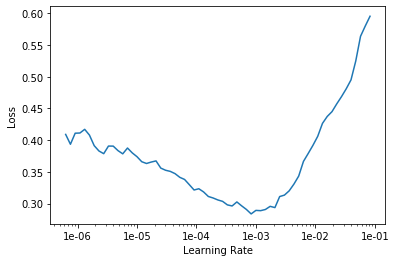

In [84]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [85]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.394309,0.401224,0.142857,00:11
1,0.296503,0.423599,0.171429,00:10
2,0.254184,0.465032,0.161905,00:10
3,0.221711,0.445937,0.152381,00:10


In [86]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.117821,0.434062,0.142857,00:12
1,0.110175,0.432039,0.142857,00:11
2,0.109828,0.426436,0.142857,00:11
3,0.106588,0.422622,0.142857,00:11


In [87]:
learn.save('fast_split_34_final')

In [103]:
# using smaller images
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=128)
       .databunch())

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [104]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.066169,1.637719,0.304762,00:07
1,1.147155,1.446805,0.314286,00:07
2,1.015965,1.388177,0.285714,00:06
3,0.910205,1.276506,0.247619,00:06


In [105]:
learn.save('fast_split_50_stage_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


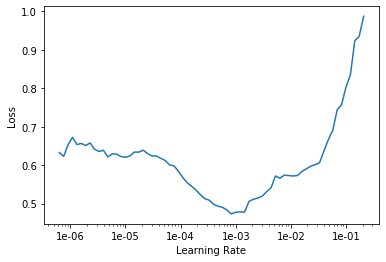

In [106]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.757798,1.252884,0.257143,00:07
1,0.640210,1.241707,0.295238,00:08
2,0.533278,1.099347,0.238095,00:07
3,0.461753,1.039976,0.285714,00:08
4,0.418195,1.030323,0.285714,00:08
5,0.371692,1.009684,0.285714,00:07


In [108]:
learn.save('fast_split_50_stage_2')

In [5]:
# bigger images
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=244)
       .databunch(bs=bs//2))

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [6]:
learn.load('fast_split_50_stage_2')
learn.freeze()

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.478009,0.558417,0.171429,00:13
1,0.556203,0.718486,0.190476,00:10
2,0.537293,0.875884,0.219048,00:10
3,0.478176,0.719504,0.219048,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


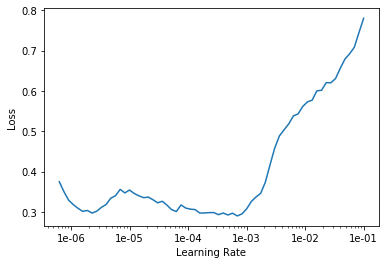

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.319767,0.672208,0.209524,00:12
1,0.278314,0.586585,0.200000,00:13
2,0.237759,0.579816,0.190476,00:13
3,0.203420,0.601793,0.200000,00:14
4,0.178552,0.556578,0.180952,00:13
5,0.160537,0.552321,0.190476,00:13


In [10]:
learn.save('fast_split_50_244_stage_2')

In [11]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.087528,0.569626,0.180952,00:13
1,0.100422,0.589686,0.190476,00:13
2,0.091865,0.665404,0.171429,00:12
3,0.076918,0.669111,0.180952,00:13
4,0.068309,0.647896,0.180952,00:13
5,0.061883,0.659602,0.190476,00:13


In [12]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.4)

epoch,train_loss,valid_loss,error_rate,time
0,0.040633,0.661800,0.180952,00:13
1,0.037549,0.731250,0.228571,00:14
2,0.045355,0.681300,0.200000,00:13
3,0.064368,0.589908,0.180952,00:13
4,0.063782,0.547771,0.142857,00:14
5,0.054759,0.550632,0.152381,00:14


In [13]:
learn.save('fast_split_50_244_stage_22')

In [14]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.046363,0.569014,0.152381,00:14
1,0.032865,0.674656,0.152381,00:13
2,0.027640,0.854521,0.200000,00:13
3,0.036096,0.685279,0.190476,00:14
4,0.051495,0.724132,0.171429,00:13
5,0.045384,0.739957,0.152381,00:14


In [15]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.045251,0.710921,0.161905,00:13
1,0.030979,0.688519,0.180952,00:13
2,0.025277,0.573856,0.152381,00:13
3,0.021562,0.683254,0.190476,00:13
4,0.021631,0.649261,0.161905,00:13
5,0.019915,0.621782,0.171429,00:15


In [16]:
learn.load('fast_split_50_244_stage_22')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
original,original,original,fake,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [17]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.042657,0.572143,0.152381,00:13
1,0.038854,0.654397,0.171429,00:13
2,0.044164,0.797165,0.209524,00:13
3,0.034555,0.734770,0.180952,00:13
4,0.031702,0.836197,0.161905,00:14
5,0.035204,0.769215,0.171429,00:15


In [18]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.030998,0.793522,0.190476,00:13
1,0.038298,0.773199,0.180952,00:13
2,0.025597,0.740237,0.171429,00:13
3,0.021512,0.675157,0.161905,00:13
4,0.026796,0.875943,0.190476,00:13
5,0.031474,0.890711,0.161905,00:13


In [32]:
# loading the best performing model
# using the full size images
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=244)
       .databunch(bs=bs))
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [33]:
learn.load('fast_split_34_final')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,original,original,fake,original
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [34]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.4)

epoch,train_loss,valid_loss,error_rate,time
0,0.199284,0.077316,0.038095,00:11
1,0.172151,0.092328,0.047619,00:10
2,0.160283,0.133686,0.066667,00:10
3,0.145917,0.133591,0.057143,00:10
4,0.128354,0.133641,0.028571,00:10
5,0.118263,0.133740,0.047619,00:10


In [35]:
learn.save('fast_split_34_final_dropout')

In [36]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.4)

epoch,train_loss,valid_loss,error_rate,time
0,0.092488,0.134729,0.047619,00:11
1,0.078079,0.144204,0.047619,00:10
2,0.076790,0.193678,0.076190,00:10
3,0.063182,0.210579,0.066667,00:10
4,0.061217,0.208904,0.085714,00:10
5,0.058863,0.214507,0.085714,00:10


In [37]:
learn.load('fast_split_34_final_dropout')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
fake,original,original,fake,original
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [38]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4), pct_start=.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.069355,0.134774,0.047619,00:10
1,0.071027,0.131906,0.047619,00:10
2,0.068351,0.139976,0.057143,00:10
3,0.063630,0.143104,0.057143,00:11


#### Applying different set of data augmentation then using the new data to retrain my best models

In [44]:
tfms = get_transforms(max_rotate=30., max_lighting=.5)

In [45]:
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(tfms, size=128)
       .databunch(bs=bs))
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [46]:
learn.load('fast_split_34_final_dropout')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
fake,original,fake,fake,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [47]:
learn.freeze()
learn.fit(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.324524,0.221997,0.066667,00:06
1,0.342345,0.263367,0.095238,00:06
2,0.327840,0.196037,0.066667,00:07
3,0.303084,0.170377,0.057143,00:06


In [48]:
learn.fit(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.235900,0.163670,0.038095,00:06
1,0.220485,0.171165,0.047619,00:06
2,0.232209,0.182430,0.047619,00:06
3,0.217722,0.192220,0.066667,00:06
4,0.217835,0.185075,0.066667,00:06
5,0.207379,0.194493,0.076190,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


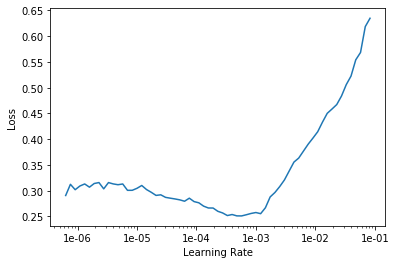

In [49]:
learn.load('fast_split_34_final_dropout')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.305844,0.125556,0.028571,00:06
1,0.291511,0.126248,0.028571,00:06
2,0.279128,0.123604,0.038095,00:06
3,0.268578,0.120744,0.038095,00:06
4,0.256962,0.125855,0.019048,00:06
5,0.245387,0.120561,0.019048,00:06


In [51]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.133891,0.106652,0.019048,00:06
1,0.152595,0.096878,0.019048,00:06
2,0.176291,0.090789,0.009524,00:08
3,0.163795,0.087869,0.019048,00:06
4,0.154545,0.095052,0.019048,00:06
5,0.152976,0.100081,0.019048,00:06


In [52]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.175175,0.099817,0.019048,00:06
1,0.164175,0.100361,0.019048,00:06
2,0.148162,0.108906,0.028571,00:06
3,0.148733,0.112464,0.028571,00:06
4,0.134209,0.117424,0.028571,00:06
5,0.123630,0.113350,0.028571,00:06


In [53]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.133760,0.115099,0.028571,00:06
1,0.121639,0.116774,0.028571,00:06
2,0.109246,0.111741,0.028571,00:06
3,0.107203,0.122194,0.038095,00:06
4,0.097285,0.129553,0.057143,00:06
5,0.091168,0.117493,0.047619,00:06


In [54]:
learn.save('fast_split_34_final_dropout_aug_128')

In [55]:
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(tfms, size=224)
       .databunch(bs=bs))
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [66]:
learn.load('fast_split_34_final_dropout_aug_128')
learn.freeze()

In [67]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.166254,0.113544,0.057143,00:09
1,0.142543,0.076722,0.038095,00:10
2,0.138323,0.093585,0.057143,00:09
3,0.128908,0.086007,0.028571,00:09
4,0.148518,0.095037,0.038095,00:09
5,0.138595,0.106855,0.057143,00:09
6,0.130433,0.083835,0.038095,00:10
7,0.126280,0.086982,0.047619,00:09
8,0.121993,0.090292,0.047619,00:09
9,0.116836,0.085213,0.038095,00:10


In [68]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.095763,0.092990,0.057143,00:10
1,0.102627,0.088684,0.047619,00:10
2,0.098923,0.039926,0.009524,00:11
3,0.095057,0.052486,0.019048,00:09
4,0.102700,0.051393,0.028571,00:09
5,0.098261,0.051408,0.028571,00:09


In [69]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.067098,0.048249,0.028571,00:09
1,0.067774,0.053458,0.038095,00:09
2,0.068112,0.090568,0.057143,00:10
3,0.066059,0.086926,0.038095,00:10
4,0.067297,0.095249,0.047619,00:10
5,0.071609,0.089067,0.047619,00:10


In [70]:
learn.save('fast_split_34_final_dropout_aug_128_stage_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


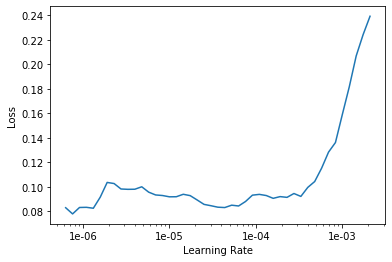

In [71]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.110016,0.115452,0.047619,00:10
1,0.090166,0.119379,0.047619,00:10
2,0.086711,0.097673,0.057143,00:10
3,0.077308,0.106644,0.047619,00:10
4,0.075904,0.134698,0.057143,00:12
5,0.075935,0.137601,0.057143,00:09


In [74]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.4)

epoch,train_loss,valid_loss,error_rate,time
0,0.064669,0.158844,0.066667,00:11
1,0.055633,0.210121,0.085714,00:11
2,0.068313,0.205093,0.057143,00:11
3,0.057407,0.248881,0.066667,00:10
4,0.057164,0.255756,0.076190,00:10
5,0.066013,0.244856,0.076190,00:10


In [75]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.063577,0.256571,0.095238,00:10
1,0.056100,0.250755,0.085714,00:10
2,0.053696,0.237667,0.085714,00:09
3,0.046072,0.269800,0.095238,00:10
4,0.049149,0.319753,0.104762,00:10
5,0.047815,0.330500,0.104762,00:10


In [65]:
learn.save('fast_split_34_final_dropout_aug_128_stage_2')

In [77]:
learn.load('fast_split_34_final_dropout_aug_128')
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5, 3e-4), pct_start=.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.127833,0.106000,0.047619,00:10
1,0.120134,0.060855,0.019048,00:10
2,0.120949,0.037858,0.009524,00:10
3,0.118583,0.033084,0.000000,00:12
4,0.113470,0.051199,0.019048,00:10
5,0.106773,0.061004,0.019048,00:10
6,0.104242,0.044250,0.019048,00:10
7,0.095645,0.074190,0.019048,00:10
8,0.096428,0.064992,0.019048,00:10
9,0.090440,0.068100,0.028571,00:09


In [78]:
learn.save('fast_split_34_final_dropout_aug_128_stage_2')

In [84]:
learn.load('fast_split_34_final_dropout_aug_128_stage_2')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fake,fake,fake,original,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [85]:
learn.fit_one_cycle(10, max_lr=slice(1e-5, 3e-4), pct_start=.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.051147,0.066241,0.028571,00:11
1,0.073918,0.068691,0.028571,00:10
2,0.063871,0.070228,0.038095,00:10
3,0.061951,0.088245,0.038095,00:10
4,0.058205,0.100886,0.038095,00:09
5,0.057882,0.067378,0.038095,00:10
6,0.055359,0.094821,0.057143,00:10
7,0.053066,0.076292,0.028571,00:10
8,0.049523,0.067188,0.028571,00:12
9,0.051441,0.057251,0.019048,00:11


In [86]:
learn.save('fast_split_34_final_dropout_aug_128_stage_2_best')

In [92]:
learn.load('fast_split_34_final_dropout_aug_128_stage_2_best')

Exception ignored in: <function _ConnectionBase.__del__ at 0x7feaef30a440>
Traceback (most recent call last):
  File "/home/kelwa/anaconda3/lib/python3.7/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/home/kelwa/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/kelwa/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/home/kelwa/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/kelwa/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kelwa/anaconda3/lib/python3.7/threading.py", l

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fake,fake,fake,original,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

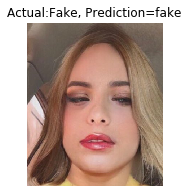

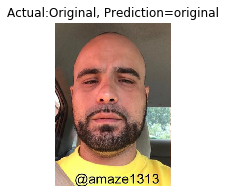

In [93]:
fake_img = open_image('test_images/fake_2.jpg')
orig_img = open_image('test_images/original_2.jpg')

test_2_images([fake_img, orig_img], ['Fake', 'Original'])

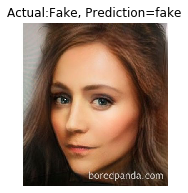

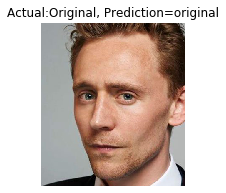

In [94]:
fake_img = open_image('test_images/fake_1.jpg')
orig_img = open_image('test_images/original_1.jpg')

test_2_images([fake_img, orig_img], ['Fake', 'Original'])